<a href="https://colab.research.google.com/github/anishh182/Stock-Market-Prediction-/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#get all the dependencies
import numpy as nm    #use to predict value and reduce loss
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  #train the model 
import matplotlib.pyplot as plt #to use graphs
plt.style.use('bmh')

In [ ]:
#load the data
from google.colab import files
upload = files.upload()


In [ ]:
#store the data into data frame 
df = pd.read_csv('RELIANCE.NS.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-20,1313.599976,1337.699951,1303.500000,1325.900024,1318.597900,12333937.0
1,2019-05-21,1332.199951,1367.000000,1330.050049,1339.800049,1332.421387,13872055.0
2,2019-05-22,1345.650024,1359.699951,1335.099976,1340.400024,1333.018066,11287400.0
3,2019-05-23,1372.000000,1392.000000,1325.000000,1333.900024,1326.553833,17722514.0
4,2019-05-24,1348.000000,1353.800049,1316.500000,1336.849976,1329.487549,10180759.0
5,2019-05-27,1337.099976,1337.500000,1307.000000,1310.650024,1303.431885,7349720.0
6,2019-05-28,1319.800049,1334.800049,1313.349976,1323.750000,1316.459717,19472659.0
7,2019-05-29,1321.000000,1333.300049,1304.150024,1313.050049,1305.818726,7112830.0
8,2019-05-30,1316.250000,1342.000000,1316.250000,1329.750000,1322.426636,10740841.0
9,2019-05-31,1337.900024,1341.900024,1320.199951,1330.150024,1322.824463,11760178.0


In [ ]:
#getting total number of entries
df.shape


(245, 7)

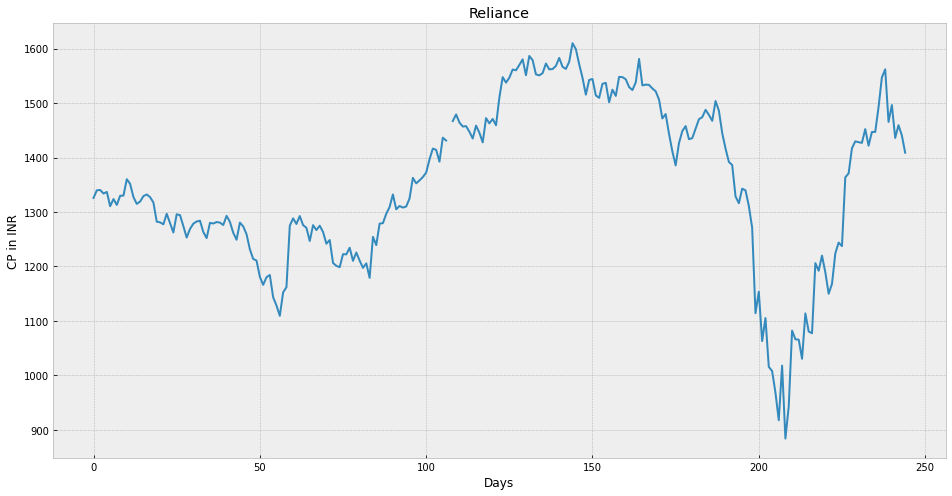

In [ ]:
#visualize the closing price data
plt.figure(figsize=(16,8))
plt.title('Reliance')
plt.xlabel('Days')
plt.ylabel('CP in INR')   #CP-Closing Price
plt.plot(df['Close'])    #defining which value is to be compared
plt.show()                #command to display graph

In [ ]:
#get 10 of the close price only displayed 
df = df[['Close']]
df.head(10)

,Close
0,1325.900024
1,1339.800049
2,1340.400024
3,1333.900024
4,1336.849976
5,1310.650024
6,1323.750000
7,1313.050049
8,1329.750000
9,1330.150024


In [ ]:
#create a variable to predict 'x' days of stock
future_day = 25
#create new column 'prediction' shifted by 'x' days
df['Prediction'] = df[['Close']].shift(-future_day)
df.head(6)

,Close,Prediction
0,1325.900024,1295.849976
1,1339.800049,1294.150024
2,1340.400024,1274.150024
3,1333.900024,1253.099976
4,1336.849976,1268.849976
5,1310.650024,1278.500000


In [ ]:
#create feature data set (X) and convert it to array 
X = nm.array(df.drop(['Prediction'],1))[:-future_day] #the predictions made for next 25 days
print (X)

In [ ]:
#create target data set (Y) and convert it to array
Y = nm.array(df['Prediction'])[:-future_day]
print (Y)
#the output gives us the entire data set which will be used for training and testing

[1295.849976 1294.150024 1274.150024 1253.099976 1268.849976 1278.5
 1282.550049 1284.       1263.349976 1252.050049 1280.099976 1278.849976
 1281.550049 1280.5      1276.099976 1293.       1281.849976 1261.849976
 1249.       1280.5      1273.550049 1259.099976 1231.5      1213.800049
 1210.949951 1180.900024 1166.25     1180.25     1184.349976 1143.349976
 1128.300049 1109.400024 1152.349976 1162.099976 1274.75     1288.25
 1278.       1292.599976 1275.949951 1270.949951 1246.75     1275.849976
 1266.800049 1274.849976 1263.300049 1241.75     1248.550049 1206.400024
 1201.150024 1198.599976 1222.5      1222.199951 1234.400024 1210.349976
 1225.599976 1210.75     1197.449951 1205.699951 1179.050049 1254.349976
 1239.199951 1278.699951 1279.550049 1296.800049 1309.050049 1332.25
 1304.900024 1311.050049 1308.099976 1310.099976 1324.75     1362.75
 1352.599976 1358.       1364.150024 1372.349976 1396.5      1416.349976
 1414.150024 1392.400024 1436.449951 1431.199951         nan 1467.05

In [ ]:
#Split the above entries in 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25)

In [ ]:
#now we create the model and train them
dtr = DecisionTreeRegressor().fit(x_train, y_train)   #decision tree regression model
lin = LinearRegression().fit(x_train, y_train)        #linear regression model

In [ ]:
#get the last 'X' rows of feature data set
X_future = df.drop(['Prediction'],1)[:-future_day]    #selecting the X row
X_future = X_future.tail(future_day)
X_future = nm.array(X_future)
X_future


array([[1342.849976],
       [1339.699951],
       [1311.150024],
       [1271.      ],
       [1114.150024],
       [1153.550049],
       [1063.      ],
       [1105.300049],
       [1015.700012],
       [1008.      ],
       [ 968.5     ],
       [ 917.700012],
       [1017.950012],
       [ 884.049988],
       [ 943.400024],
       [1082.25    ],
       [1066.199951],
       [1065.599976],
       [1030.449951],
       [1113.75    ],
       [1080.449951],
       [1077.449951],
       [1206.099976],
       [1192.150024],
       [1219.949951]])

In [ ]:
#Showing model tree prediction
dtr_prediction = dtr.predict(X_future)
print(tree_prediction)
print()
#Showing model linear prediction
lin_prediction = lin.predict(X_future)
print(lin_prediction)

[1189.150024 1149.849976 1168.050049 1224.       1243.800049 1237.349976
 1363.599976 1370.900024 1417.       1429.75     1446.930054 1426.949951
 1452.22998  1421.719971 1446.930054 1447.030029 1492.800049 1547.130005
 1561.98999  1465.359985 1447.030029 1435.949951 1459.400024 1364.150024
 1408.900024]

[1349.56254422 1348.9630583  1343.52967944 1335.88866895 1306.03831786
 1313.53659494 1296.30388109 1304.35406602 1287.30215037 1285.83674969
 1278.31944622 1268.65162532 1287.7303512  1262.24763945 1273.54263264
 1299.96737708 1296.9128685  1296.79868637 1290.10923309 1305.9621887
 1299.62480709 1299.05387265 1323.53744932 1320.88261331 1326.17325856]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


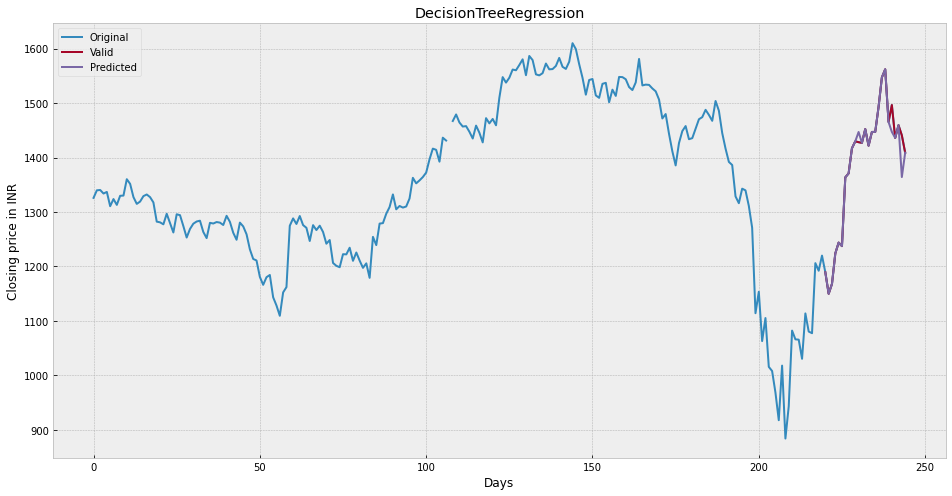

In [ ]:
#Visualize the data in the graph form


valid = df[X.shape[0]:]
valid['Predictions'] = dtr_prediction
plt.figure(figsize=(16,8))
plt.title('DecisionTreeRegression')
plt.xlabel('Days')
plt.ylabel('Closing price in INR')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Predicted']) 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


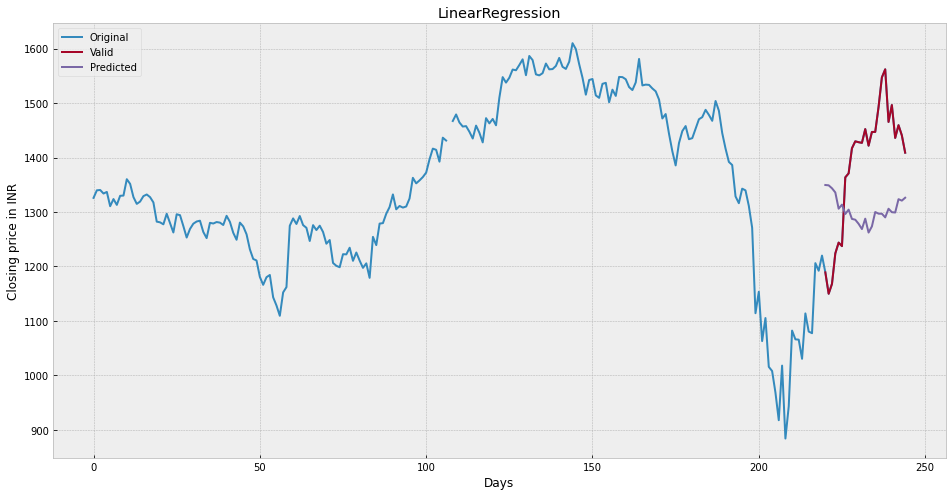

In [ ]:
#Visualize the data in the linear graph form


valid = df[X.shape[0]:]
valid['Predictions'] =  lin_prediction
plt.figure(figsize=(16,8))
plt.title('LinearRegression')
plt.xlabel('Days')
plt.ylabel('Closing price in INR')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Predicted']) 
plt.show()